In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
misc_list=['id','Unnamed: 32']
df.drop(misc_list,axis=1,inplace=True)
df.shape

(569, 31)

### Missing Values
First we need to analyze the data starting with missing values

In [5]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
features_with_na

[]

### Numerical Variables

all the numerical variables needs to be analyzed as a part of this

In [6]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_float_dtype
num_features=[feature for feature in df.columns if(is_float_dtype(df[feature]))]
df[num_features].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Discrete numerical Variables

all the discrete numerical variables needs to be analyzed as a part of this

In [7]:
disc_num_list=[feature for feature in num_features if len(df[feature].unique())<25 and feature not in misc_list]
disc_num_list

[]

#### Continuous numerical Variables

all the continuoius numerical variables needs to be analyzed as a part of this

In [8]:
con_num_list=[feature for feature in num_features if feature not in disc_num_list+misc_list]
df[con_num_list].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


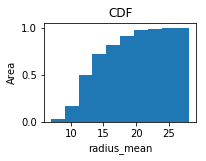

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


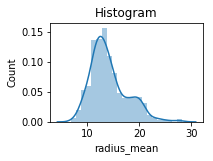

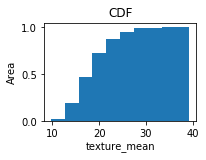

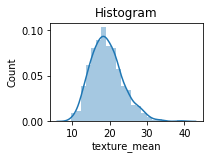

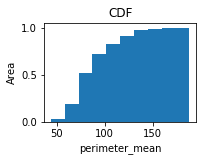

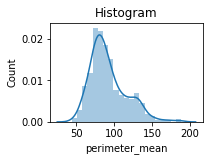

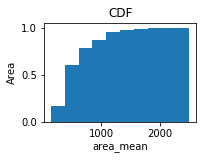

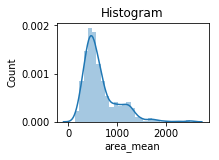

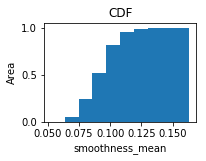

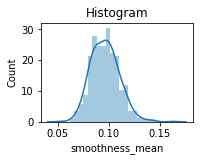

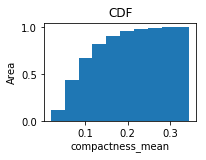

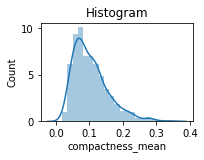

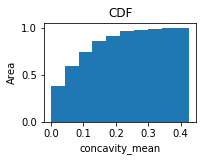

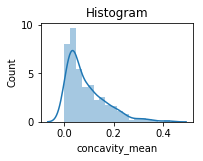

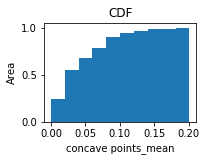

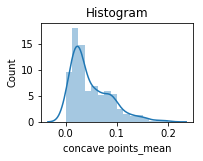

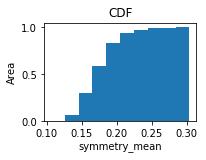

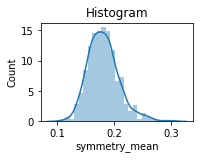

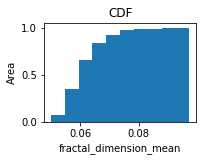

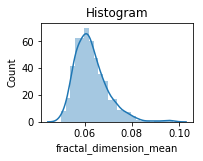

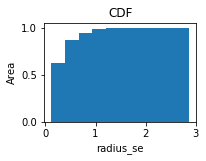

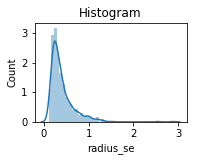

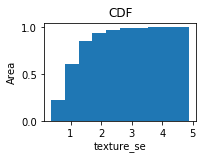

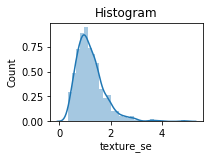

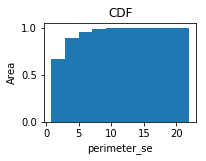

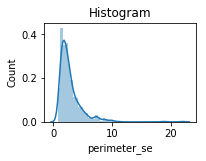

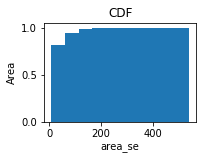

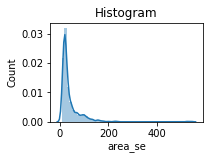

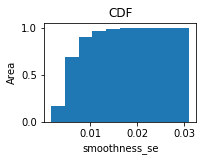

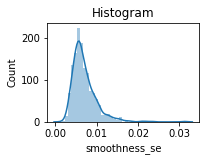

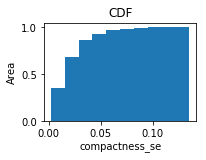

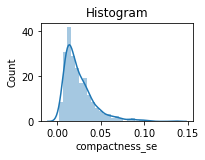

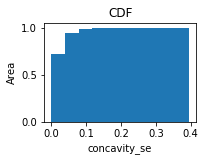

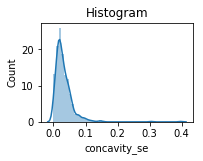

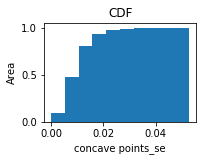

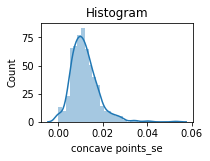

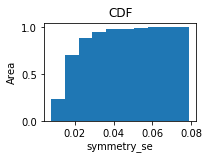

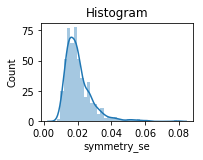

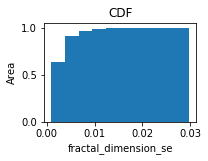

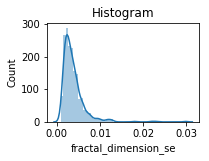

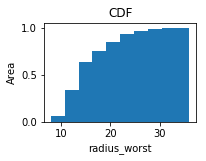

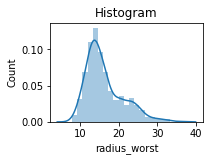

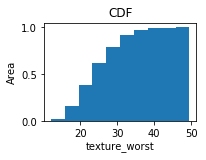

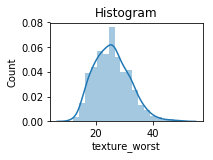

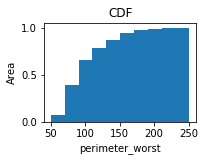

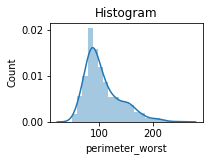

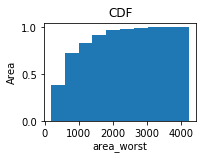

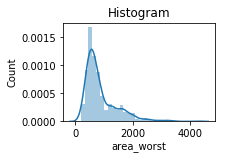

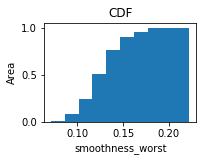

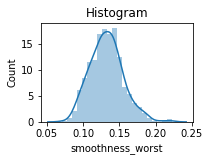

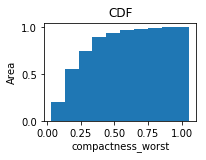

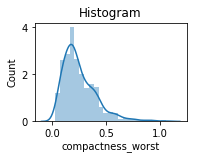

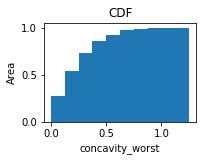

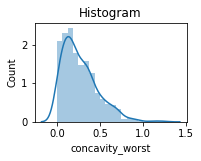

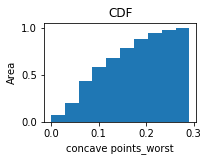

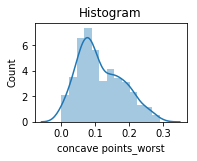

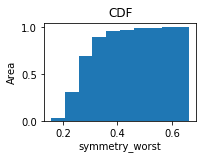

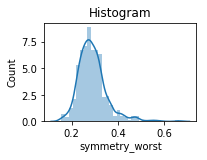

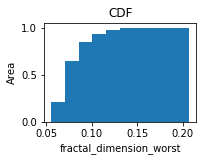

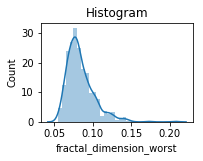

In [9]:
for feature in con_num_list:
    plt.subplot(2,2,1)
    df1=df.copy()
    plt.hist(df1[feature],density=True,cumulative=True)
    plt.xlabel(feature)
    plt.ylabel("Area")
    plt.title("CDF")
    plt.show()
    plt.subplot(2,2,2)
    sns.distplot(df1[feature],hist=True,kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Histogram")
    plt.show()

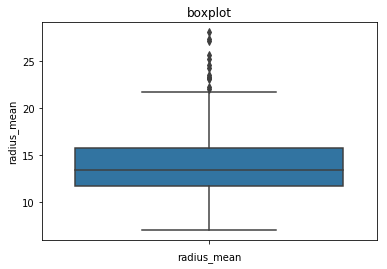

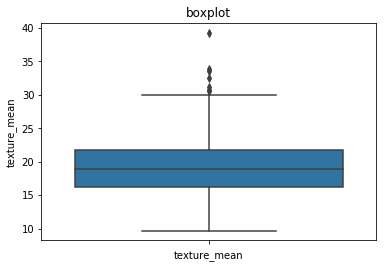

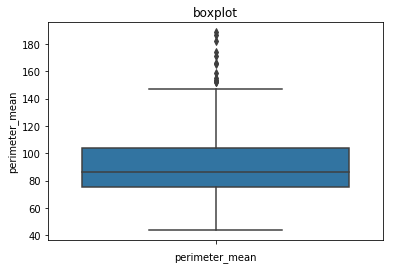

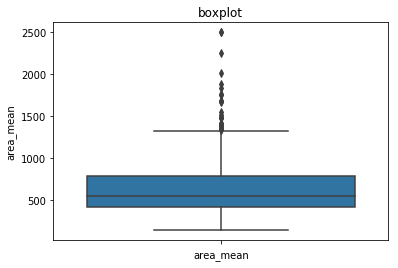

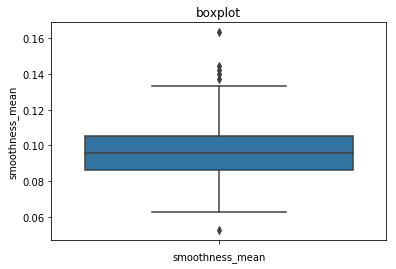

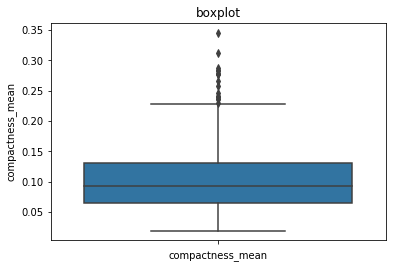

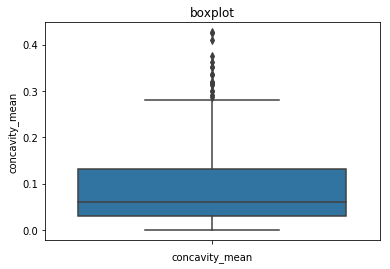

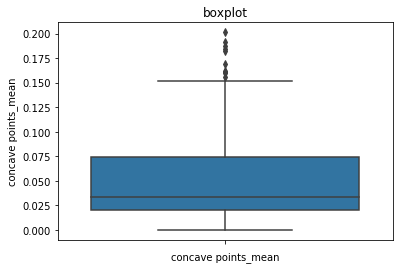

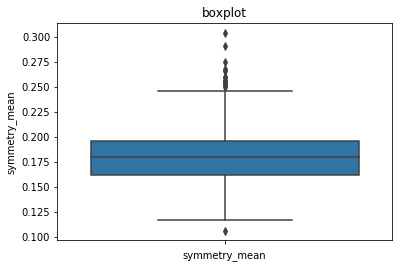

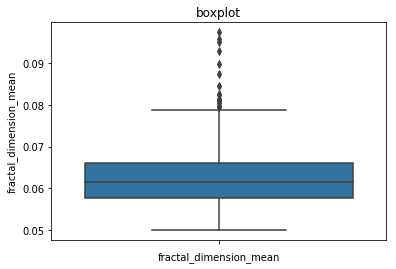

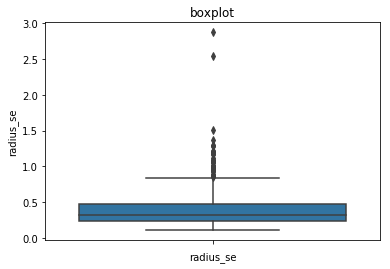

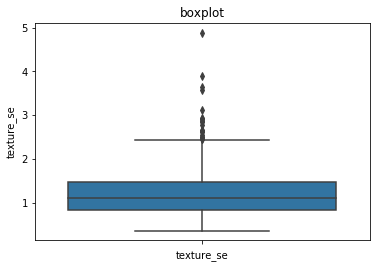

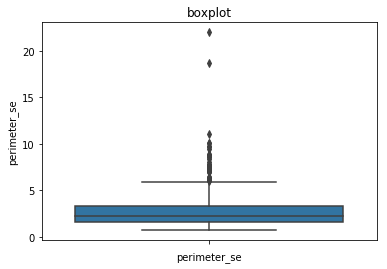

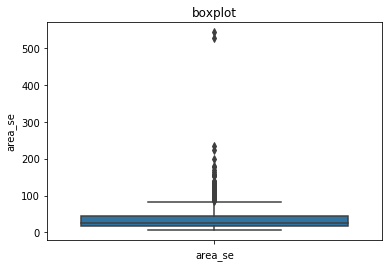

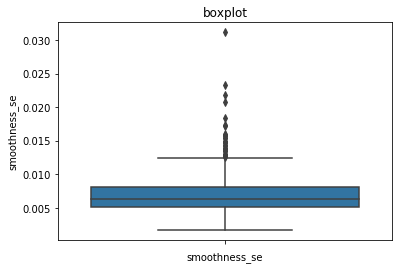

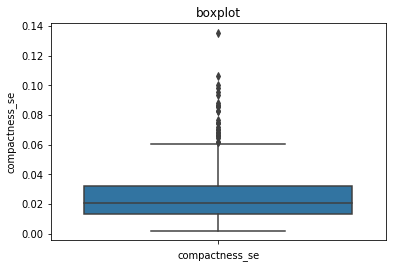

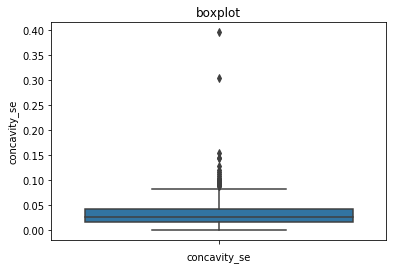

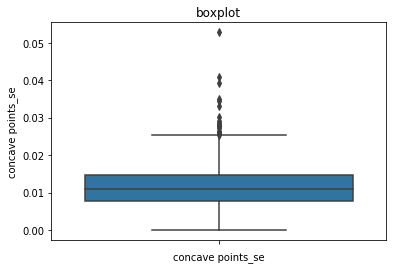

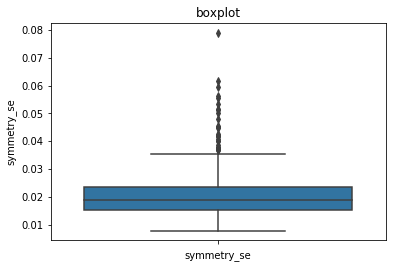

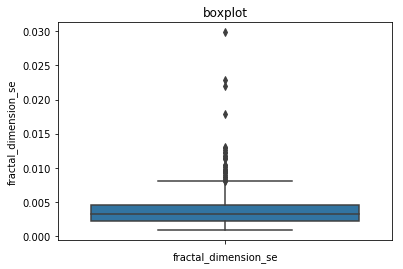

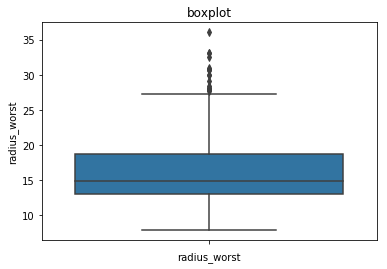

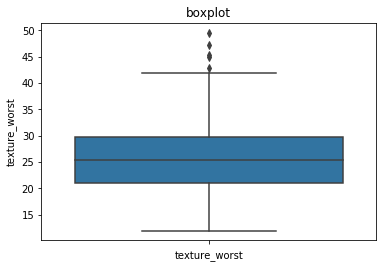

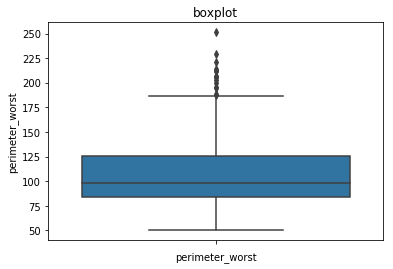

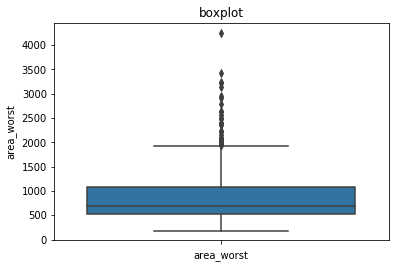

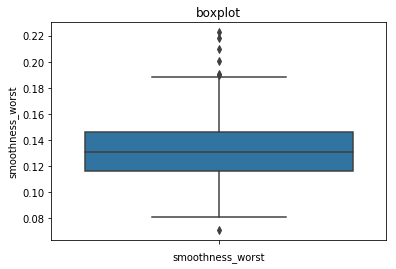

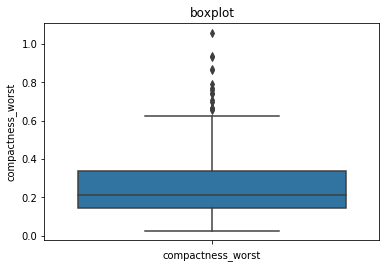

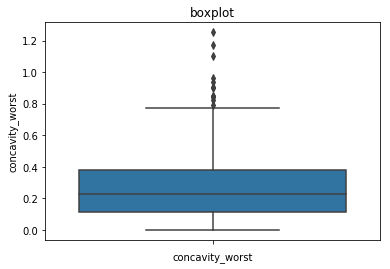

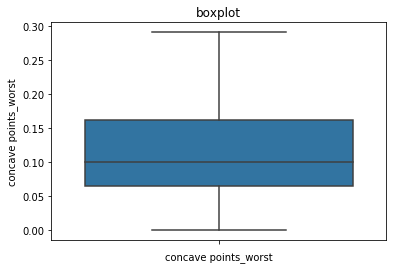

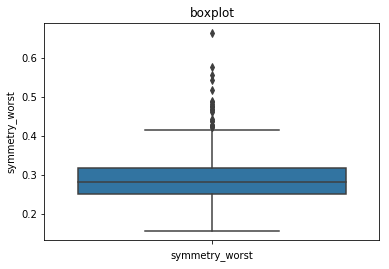

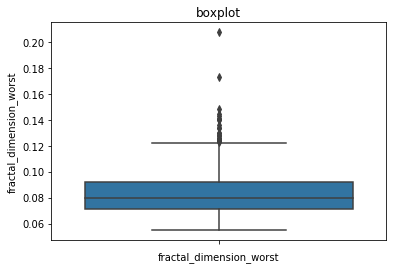

In [10]:
for feature in con_num_list:
    sns.boxplot(df[feature],orient="v")
    plt.xlabel(feature)
    plt.title('boxplot')
    plt.show()

In [11]:
from pandas.api.types import is_float_dtype
from collections import defaultdict
#from scipy.stats import iqr
outliers=defaultdict(list)
num_list=list()
for col in df.columns:
    if(is_float_dtype(df[col])):
        num_list.append(col)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        #q75, q25 = iqr(df[col])
        #iqr = q75 - q25
        #print(col, ":" ,IQR)
        #for i in range(0,len(num_list)+1):
        for index, row in df.iterrows():
            if((row[col]<(Q1-3*IQR)) or (row[col]>(Q3+3*IQR))):
                    outliers[col].append(row[col])
                #else:
                    
for key,values in outliers.items():
    print("The number of strong outliers present in {} is:{}".format(key,len(values)))
    for i in values:
        print(i)

The number of strong outliers present in radius_mean is:1
28.11
The number of strong outliers present in texture_mean is:1
39.28
The number of strong outliers present in area_mean is:5
1878.0
2250.0
2499.0
2010.0
2501.0
The number of strong outliers present in smoothness_mean is:1
0.1634
The number of strong outliers present in compactness_mean is:1
0.3454
The number of strong outliers present in symmetry_mean is:1
0.304
The number of strong outliers present in fractal_dimension_mean is:4
0.09744
0.09296
0.09502000000000001
0.09575
The number of strong outliers present in radius_se is:7
1.5090000000000001
1.296
2.873
1.2919999999999998
1.37
2.5469999999999997
1.291
The number of strong outliers present in texture_se is:4
3.568
4.885
3.647
3.8960000000000004
The number of strong outliers present in perimeter_se is:12
11.07
8.83
8.649
10.05
9.807
21.98
10.12
8.867
9.424
18.65
9.635
8.758
The number of strong outliers present in area_se is:22
153.4
134.8
170.0
233.0
128.7
525.6
155.8
137.

### Categorical Variables

We will explore categorical variables in this section which is nothing but our response variable in this case

In [12]:
cat_list=[feature for feature in df.columns if(is_string_dtype(df[feature]))]
cat_list

['diagnosis']

In [13]:
for feature in cat_list:
    print("The number of unique values in {} is:{}".format(feature,len(df[feature].unique())))

The number of unique values in diagnosis is:2


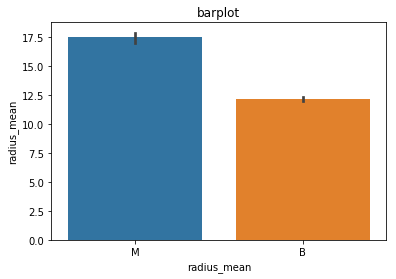

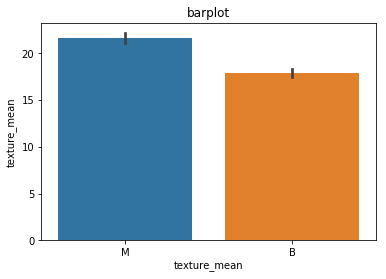

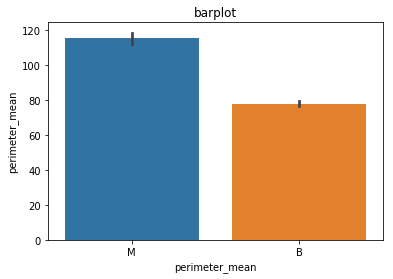

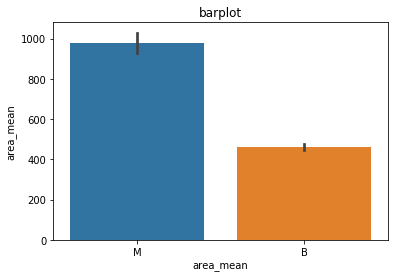

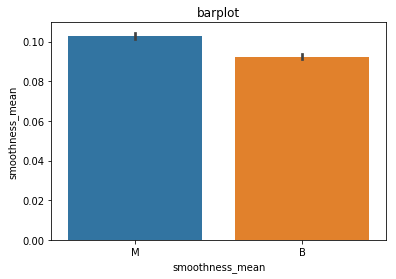

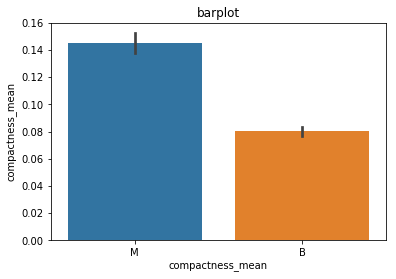

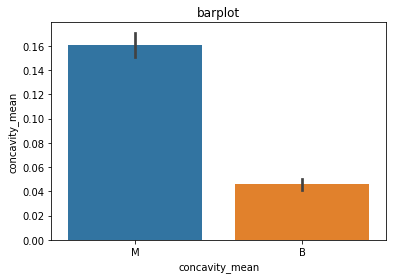

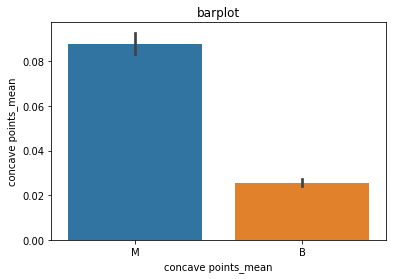

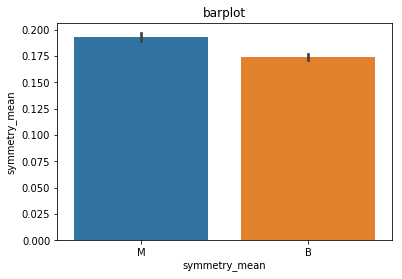

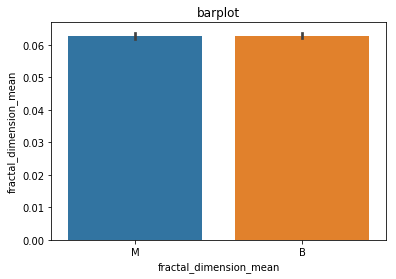

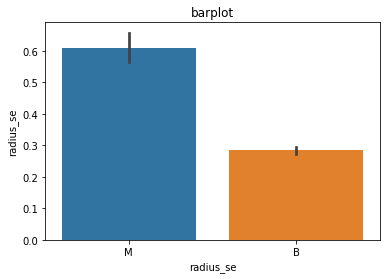

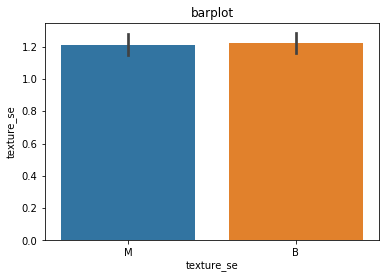

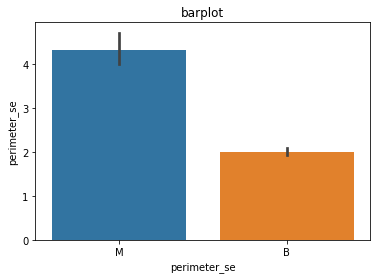

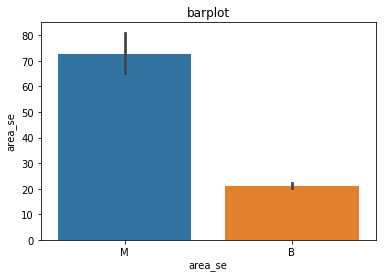

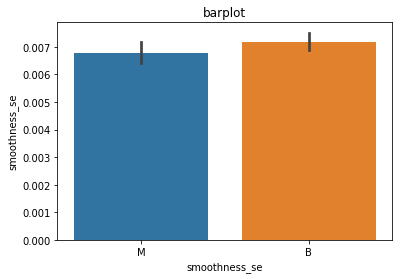

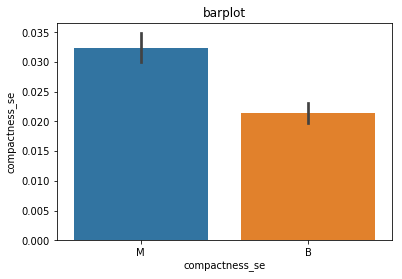

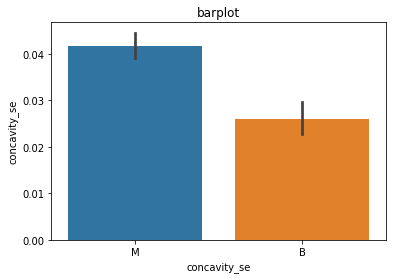

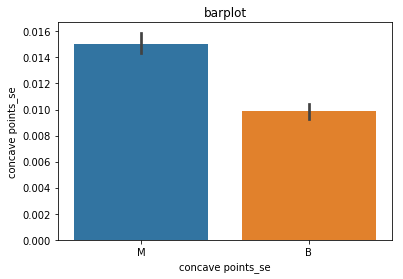

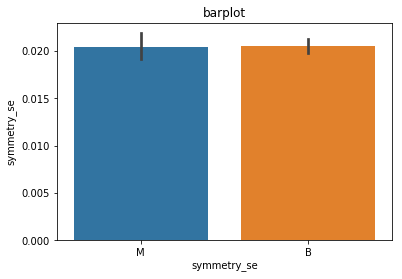

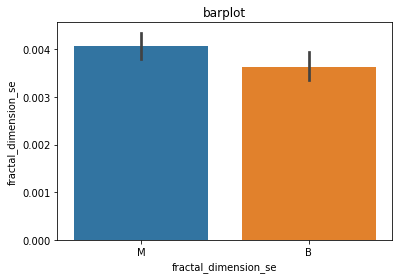

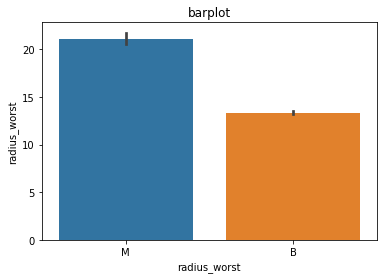

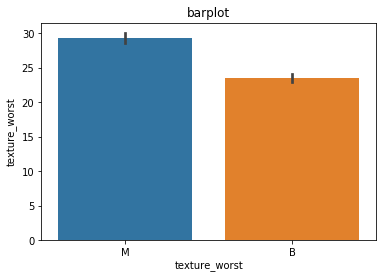

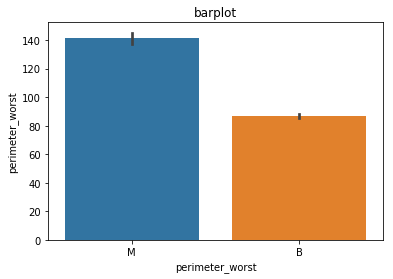

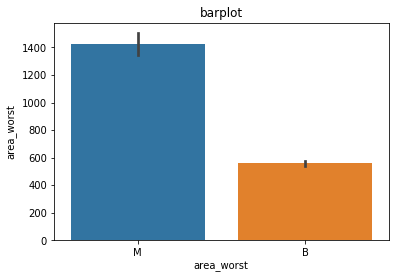

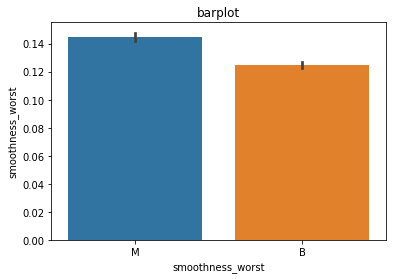

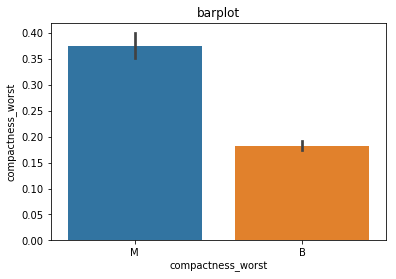

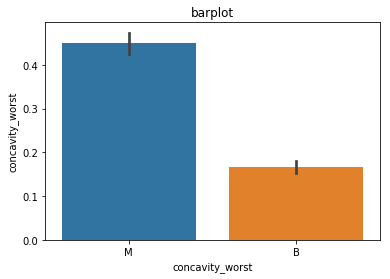

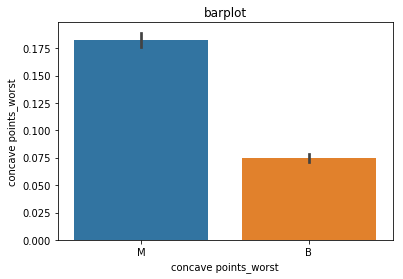

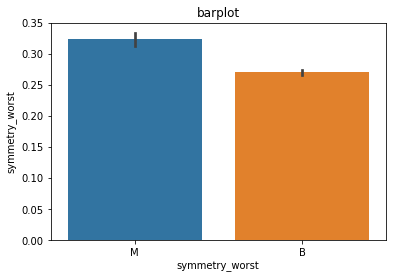

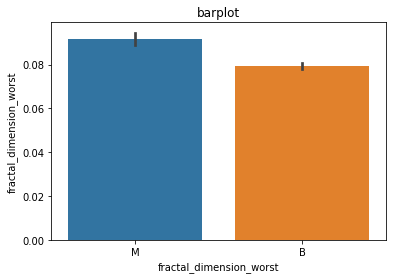

In [14]:
for feature in con_num_list:
    sns.barplot(y=df[feature],x=df['diagnosis'],orient="v")
    plt.xlabel(feature)
    plt.title('barplot')
    plt.show()

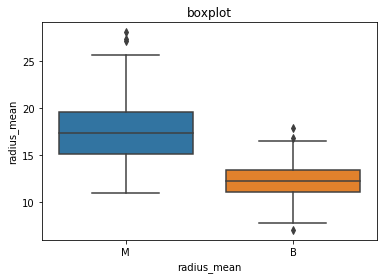

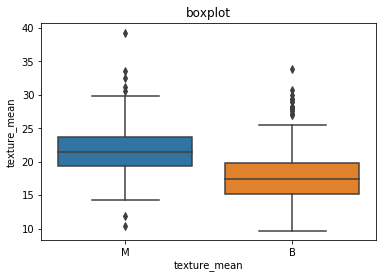

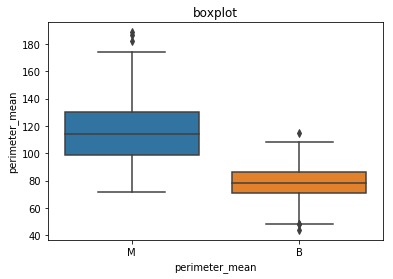

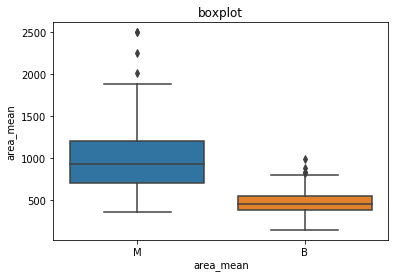

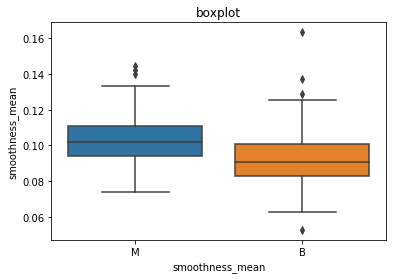

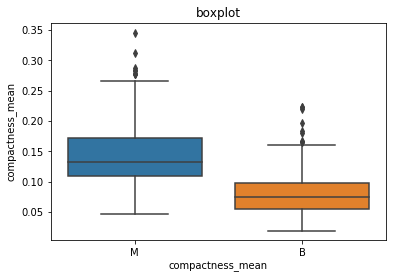

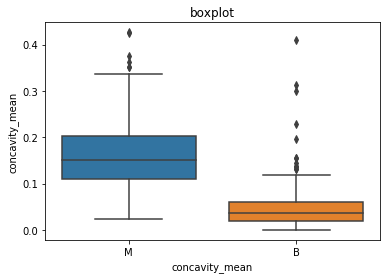

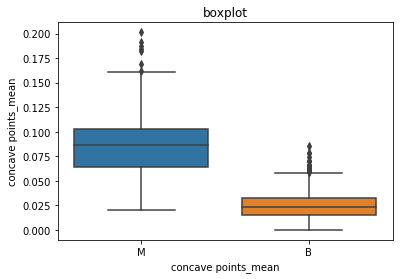

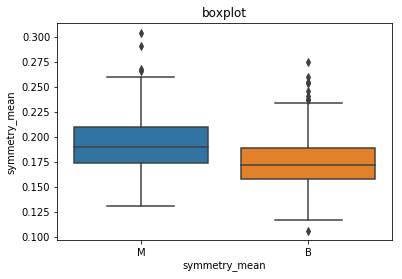

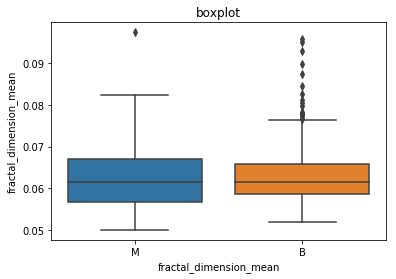

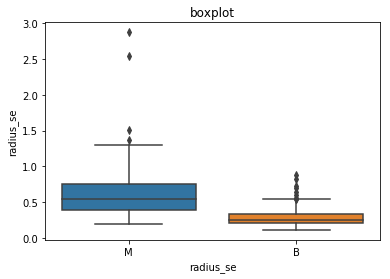

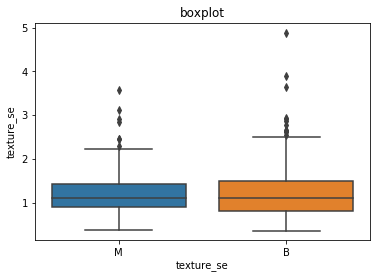

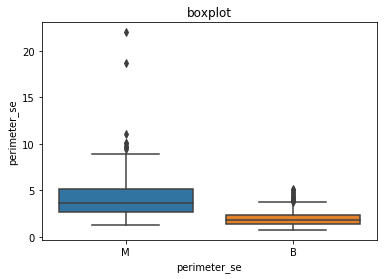

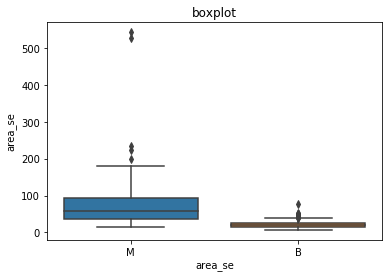

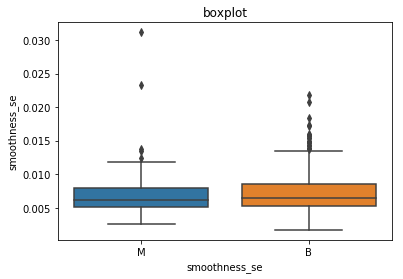

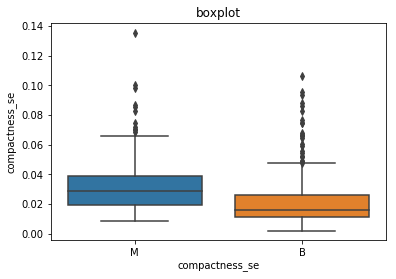

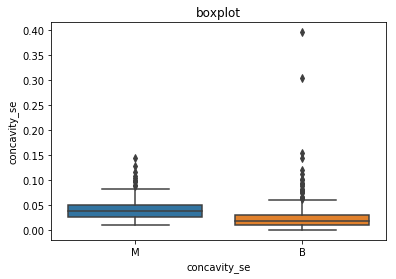

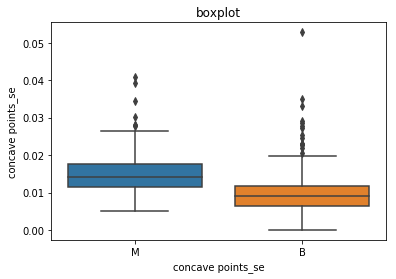

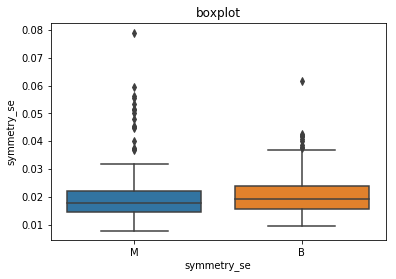

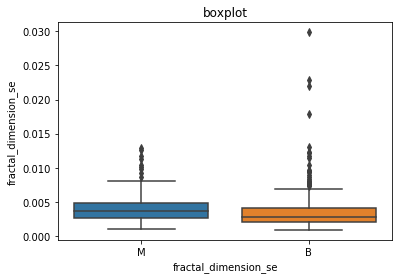

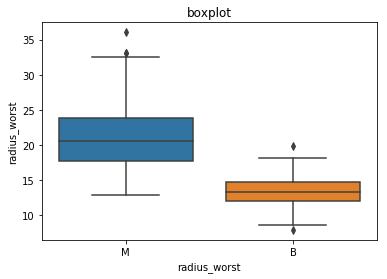

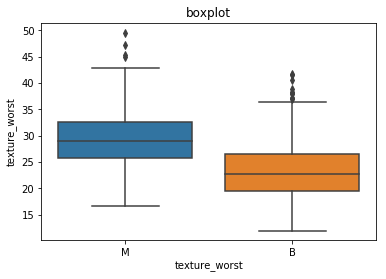

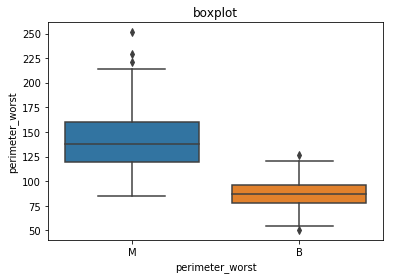

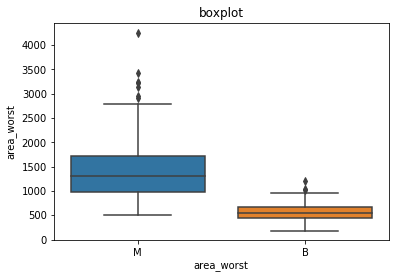

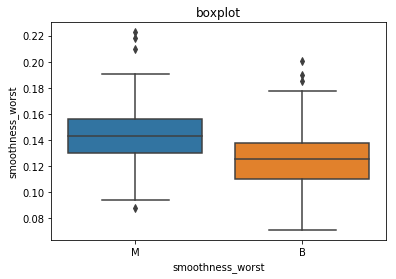

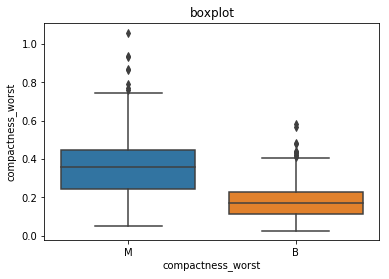

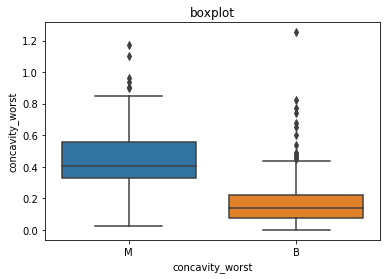

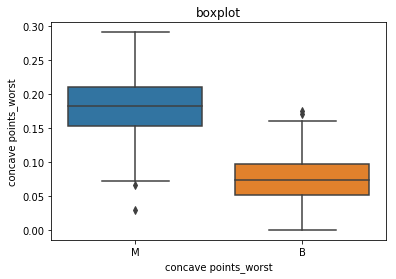

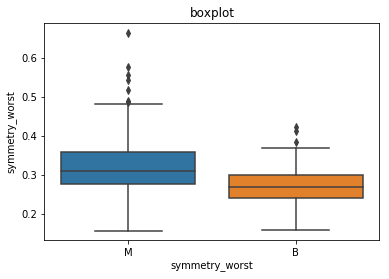

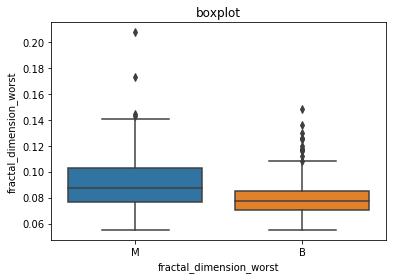

In [15]:
for feature in con_num_list:
    sns.boxplot(y=df[feature],x=df['diagnosis'],orient="v")
    plt.xlabel(feature)
    plt.title('boxplot')
    plt.show()

In [16]:
df1=df.copy()
df1.groupby(['diagnosis'])['smoothness_worst'].median()
#df1=df1.reset_index()
#df1

diagnosis
B    0.12540
M    0.14345
Name: smoothness_worst, dtype: float64

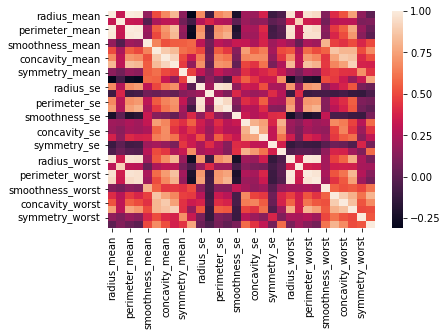

In [17]:
sns.heatmap(df.corr())